In [10]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [11]:
df = pd.read_csv('passengers2.csv')
print(df.head())

        Month  reference  target  missing
0  1949-01-01        112   112.0      NaN
1  1949-02-01        118   118.0      NaN
2  1949-03-01        132   132.0      NaN
3  1949-04-01        129     NaN    129.0
4  1949-05-01        121   121.0      NaN


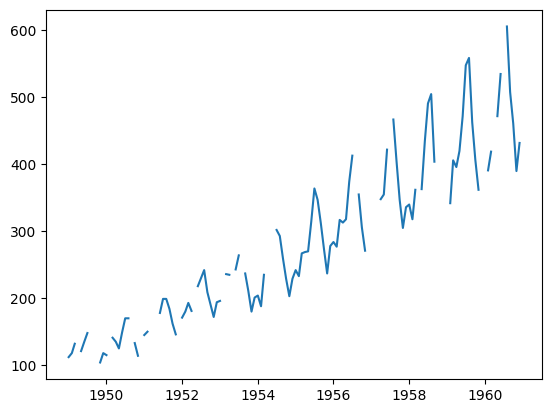

In [12]:
df["Month"] = pd.to_datetime(df["Month"])

plt.plot(df["Month"], df["target"])
plt.show()

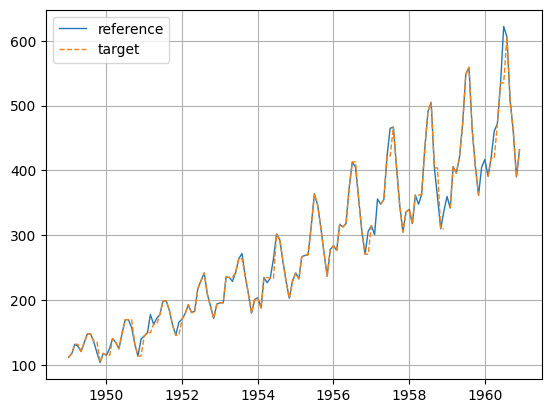

In [13]:
# 1. Восполнение предыдущими значениями (?)
df_1 = df.copy()

df_1["target_fixed"] = df_1["target"]
df_1["target_fixed"] = df_1["target_fixed"].fillna(df_1["target_fixed"].shift(1))


plt.plot(df_1["Month"], df_1["reference"], label="reference", linewidth=1)
plt.plot(df_1["Month"], df_1["target_fixed"], label="target", linestyle='--', linewidth=1)

plt.legend()
plt.grid(True)
plt.show()

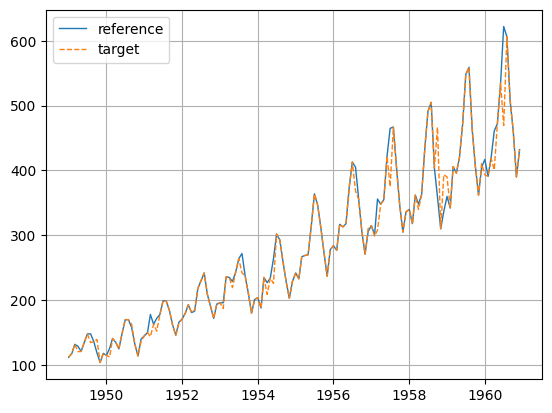

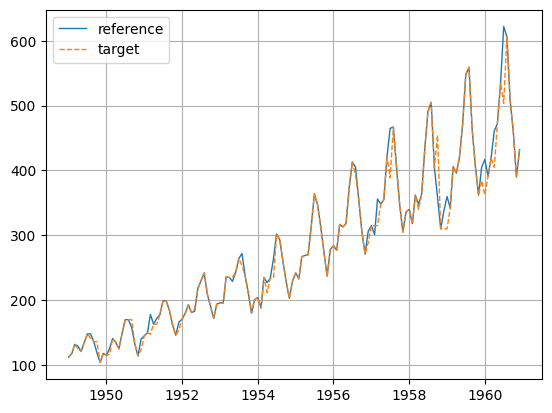

In [14]:
# 2 Восполнение данных с помощью скользящего среднего
df_2_1 = df.copy()
df_2_1["target_fixed"] = df_2_1["target"]

for i in range(3, len(df_2_1)):
    if pd.isna(df_2_1.loc[i, "target_fixed"]):
        df_2_1.loc[i, "target_fixed"] = df_2_1.loc[i-3:i-1, "target_fixed"].mean()

plt.plot(df_2_1["Month"], df_2_1["reference"], label="reference", linewidth=1)
plt.plot(df_2_1["Month"], df_2_1["target_fixed"], label="target", linestyle='--', linewidth=1)
plt.legend()
plt.grid(True)
plt.show()


df_2_2 = df.copy()

df_2_2["target_fix" ] = df_2_2["target"].rolling(window=3, min_periods=1).mean()

df_2_2["target_fixed"] = df_2_2["target"].fillna(df_2_2["target_fix" ])


plt.plot(df_2_2["Month"], df_2_2["reference"], label="reference", linewidth=1)
plt.plot(df_2_2["Month"], df_2_2["target_fixed"], label="target", linestyle='--', linewidth=1)
plt.legend()
plt.grid(True)
plt.show()

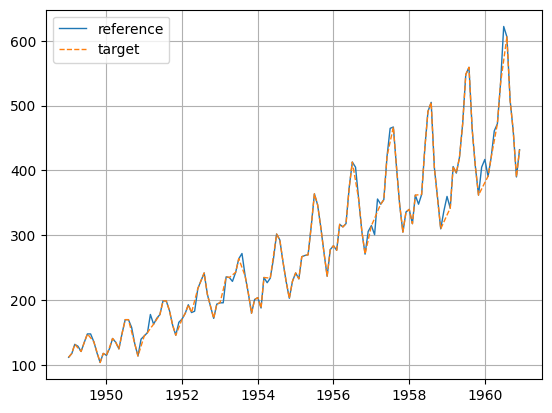

In [15]:
# 3 Интерполяция
df_3 = df.copy()
df_3["target_fixed"] = df_3["target"].interpolate(method="linear")

plt.plot(df_3["Month"], df_3["reference"], label="reference", linewidth=1)
plt.plot(df_3["Month"], df_3["target_fixed"], label="target", linestyle='--', linewidth=1)
plt.legend()
plt.grid(True)
plt.show()

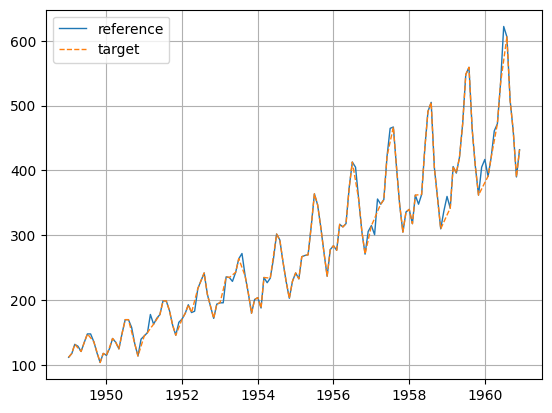

In [16]:
# 4.1  Сглаживание данных с помощью экспоненциального сглаживания с помощью формулы (простое экспоненциальное сглаживание)
df_4 = df_3.copy()
d = 0.5

S = [df["reference"].iloc[0]] #x0

for t in range(1, len(df)):
    S_t = (1 - d) * df["reference"].iloc[t] + d * S[-1]
    S.append(S_t)
df["target_fixed"] = S

plt.plot(df_4["Month"], df_4["reference"], label="reference", linewidth=1)
plt.plot(df_4["Month"], df_4["target_fixed"], label="target", linestyle='--', linewidth=1)
plt.legend()
plt.grid(True)
plt.show()

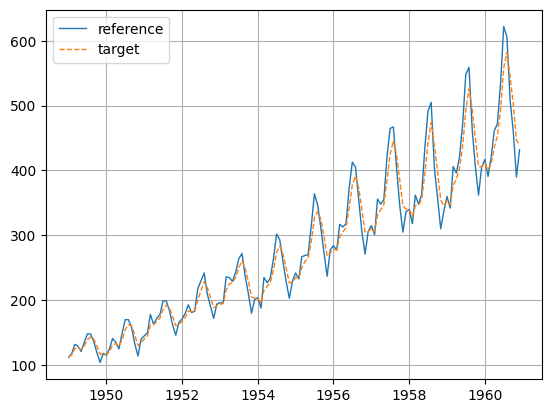

In [17]:
# 4.2  Сглаживание данных с помощью экспоненциального сглаживания с помощью методов pandas

d = 0.5
df_5 = df.copy()
df_5["target_fixed"] = df_5["reference"].ewm(alpha=d).mean()

plt.plot(df_5["Month"], df_5["reference"], label="reference", linewidth=1)
plt.plot(df_5["Month"], df_5["target_fixed"], label="target", linestyle='--', linewidth=1)
plt.legend()
plt.grid(True)
plt.show()